# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions for reconstruction, clustering, etc., should be written from scratch.

12. Change the name of the file with your roll no.



In [54]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [55]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here. 


#M reduced dimensions D initial dimensions X input matrix 
def PCA1(M, D, X):
    X_bar = np.mean(X,axis = 0)[None, :]
    S = np.dot(X.T-X_bar.T, X-X_bar)/len(X)
    eigenvals, eigenvecs = np.linalg.eig(S)
    #plt.plot(eigenvals)
    N = len(X)
    U = np.array(eigenvecs)
    Z = np.zeros((N,M))
    b = np.zeros(D)
    for n in range(N):
        for i in range(M):
            Z[n,i] = np.dot(X[n], U[: , i])
    for i in range(M,D):
        b[i] = np.dot(X_bar, U[: , i])
    
    X_tilde = np.zeros(X.shape)
    
    for n in range(N):
        for i in range(M):
            X_tilde[n, : ] += Z[n,i]*U[: , i].T
        for i in range(M,D):
            X_tilde[n, : ] += b[i]*U[: , i].T
    
    return X_tilde


def PCA2(M, D, X):
    X_bar = np.mean(X,axis = 0)[None, :]
    S = np.dot(X.T-X_bar.T, X-X_bar)/len(X)
    eigenvals, eigenvecs = np.linalg.eig(S)
    #plt.plot(eigenvals)
    N = len(X)
    U = np.array(eigenvecs)
    Z = np.zeros((N,M))
    b = np.zeros(D)
    for n in range(N):
        for i in range(M):
            Z[n,i] = np.dot(X[n], U[: , i])
    return Z


def kmeans(X,k):
    # X is an input numpy array
    # k is no of clusters to form
    (n,m) = X.shape
    #print(X[0])
    # n data points and m dimensions
    xtemp = np.copy(X)
    means = xtemp[0:k]
    #print(X[0])
    #oldmeans = np.copy(means)
    #oldmeans = oldmeans*0
    l = []
    for ii in range(0,k):
        l.append([])
    # initially means are assigned to first k data points

    # begin algorithm
    flag = 0;
    #while (np.sum(means != oldmeans) == 0):
    while (1) :
        #print(means[0])
        flag = flag + 1
        # need to assign data points to means
        # we will store data points in list of lists 
        # the first list has k lists in it , each list then corresponds to point in the clutser with that mean
        #l = []
        for ii in range(0,k):
            l[ii] = []
        # l[i] is a list of data points in the cluster with mean means[i]
        oldmeans = np.copy(means)
        #assignment step
        for jj in range(0,n):
            dist = []
            for pp in range(0,k):
                sum = 0
                sum = np.dot( means[pp]-X[jj]  , means[pp]-X[jj])
                dist.append(sum)
            temp = min(dist)
            ind = dist.index(temp)
            l[ind].append(np.copy(X[jj]))
            #if (jj==0):
                #print(ind)
        #print(X[0])
        #print(len(l))
        #print(l[0][0])
        #for ss in range(4):
            #for ss2 in range(4):
                #print(l[0][ss][ss2])
        
        #update step
        for jj in range(0,k):
            # calculate new means
            sum1 = np.zeros(m)
            for tt in range(len(l[jj])):
                sum1 = sum1 + np.array(l[jj][tt])
            means[jj] = sum1/len(l[jj])

        if(np.sum(means != oldmeans) == 0):
            break
    # finding cost function
    #print(flag)
    cost = 0
    for ii in range(0,k):
        for jj in range(len(l[ii])):
            cost = cost + np.dot( means[ii] - l[ii][jj]  , means[ii] - l[ii][jj])

    return [cost/n , flag]



def kmeans1(X,k):
    # X is an input numpy array
    # k is no of clusters to form
    (n,m) = X.shape
    #print(X[0])
    # n data points and m dimensions
    #oldmeans = np.copy(means)
    #oldmeans = oldmeans*0
    xtemp = np.copy(X)
    means = xtemp[0:k]

    l = []
    # initially means are assigned to first k data points

    # begin algorithm
    flag = 0;
    #while (np.sum(means != oldmeans) != 0):
    while (1):
        flag = flag + 1
        # need to assign data points to means
        # we will store data points in list of lists 
        # the first list has k lists in it , each list then corresponds to point in the clutser with that mean
        l = []
        for ii in range(0,k):
            l.append([])
        # l[i] is a list of data points in the cluster with mean means[i]
        oldmeans = np.copy(means)
        #assignment step
        for jj in range(0,n):
            dist = []
            for pp in range(0,k):
                sum = 0
                sum = np.dot( means[pp]-X[jj]  , means[pp]-X[jj])
                dist.append(sum)
            temp = min(dist)
            ind = dist.index(temp)
            l[ind].append(np.copy(X[jj]))
        
        #update step
        for jj in range(0,k):
            # calculate new means
            sum = np.zeros(m)
            for tt in range(len(l[jj])):
                sum = sum + l[jj][tt]
            means[jj] = sum/len(l[jj])

        if(np.sum(means != oldmeans) == 0):
            break

    res = []
    res.append(l)
    res.append(means)

    return res
        


**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




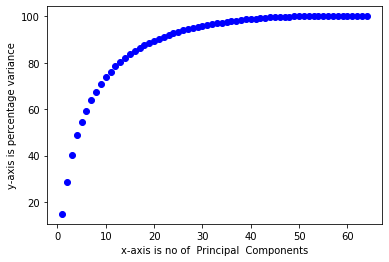

<Figure size 432x288 with 0 Axes>

In [56]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)

f = np.load("Data.npz")
dataarr = f.files[0]
inputdata = f[dataarr]
X = inputdata

xaxis = []
for i in range(1,65):
    xaxis.append(i)

# xaxis has 1 to 64

yaxis = []

X_bar = np.mean(X,axis = 0)[None, :]
S = np.dot(X.T-X_bar.T, X-X_bar)/len(X)
eigenvals, eigenvecs = np.linalg.eig(S)
sum =0;
for ii in range(0,64):
    sum= sum + eigenvals[ii]

count =0

for jj in range(1,65):
    sum2 =0
    for tt in range(0,jj):
        sum2 = sum2 + eigenvals[tt]
    sum3 = sum2/sum
    yaxis.append(sum3*100)
    if sum3 >= 0.9 :
        count += 1

#print(count)

plt.scatter(xaxis,yaxis,c = "blue")
plt.xlabel("x-axis is no of  Principal  Components")
plt.ylabel("y-axis is percentage variance")
plt.show()
plt.savefig("venu.png")
plt.close()
plt.savefig("venu.png")

#input has 1797 X 64 matrix 
#this input will be given to PCA function
# do pca for m=1 to 64 and plot and report 90% point



####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



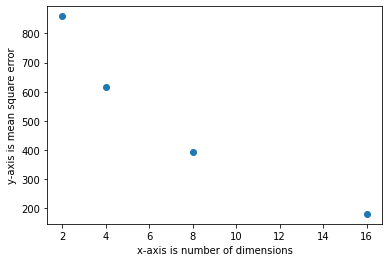

In [57]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

f = np.load("Data.npz")
dataarr = f.files[0]
inputdata = f[dataarr]
X = inputdata
(n,m) = X.shape

l = [2,4,8,16]

x2 = []

for ii in range(len(l)):
    x2.append( PCA1(l[ii],64,X) )

# find mean sqaure errors
error = []

for ii in range(len(l)):
    sum = 0
    for jj in range(n):
        for kk in range(m):
            sum = sum + ( x2[ii][jj][kk] - X[jj][kk] ) * ( x2[ii][jj][kk] - X[jj][kk] )
    sum = sum/n
    error.append(sum)

xaxis = [2,4,8,16]
#print(error)
plt.scatter(xaxis,error)
plt.xlabel("x-axis is number of dimensions")
plt.ylabel("y-axis is mean square error")
plt.show()
plt.close()

#print(l[error.index(min(error))])

#print(error)






####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


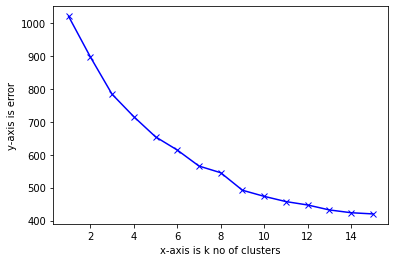

Text(0, 0.5, 'second dimension')

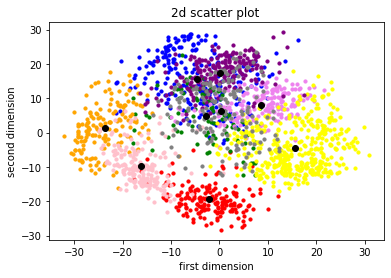

In [58]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.

f = np.load("Data.npz")
dataarr = f.files[0]
inputdata = f[dataarr]
X = inputdata

x3 = PCA2(16,64,X)
xaxis = []
yaxis = []
for ii in range(1,16):
    xaxis.append(ii)
    yaxis.append(kmeans(x3,ii)[0])
#print(yaxis)
plt.xlabel("x-axis is k no of clusters")
plt.ylabel("y-axis is error")
plt.plot(xaxis,yaxis , 'bx-')
plt.show()
plt.close()

# printing 2d clusters
res = kmeans1(x3,9)
clusters = res[0]
centroid = res[1]
#colors = cm.rainbow(np.linspace(0, 1, 11))
colors = ["red" , "blue" , "green" , "violet" ,"orange" , "yellow" , "pink" , "purple" , "grey"]

for ii in range(9):
    #plot each cluster
    xax = []
    yax = []
    for jj in range(len(clusters[ii])):
        xax.append(clusters[ii][jj][0])
        yax.append(clusters[ii][jj][1])
    plt.scatter(xax , yax ,s=10, color = colors[ii] )

xax = []
yax = []
for ii in range(9):
    xax.append(centroid[ii][0])
    yax.append(centroid[ii][1])
plt.scatter(xax , yax , c = "black")
plt.title("2d scatter plot ")
plt.xlabel("first dimension")
plt.ylabel("second dimension")



####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



Cell type : TextWrite

Report your observations, MSE values and the method used to choose the optimal number of clusters.

MSE decreases as we increase the number of reduced dimednsions,But we need to reduce the input data into considerably smaller dimensions with as minimum MSE as possible , and then do K-means clustering with optimal k.

Using PCA reduce into the dimension which has least MSE and then find out optimal no of clusters then do K-means to cluster the images

The MSE values are in the list below for M=2,4,8,16 respectively
[858.944780848728, 616.1911300562684, 391.79473611497286, 180.93970325737993]

We used elbow method to find the optimal number of clusters.

Yes the PCA + K-means clustering is consistent with how our brain clusters the images